In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MNISTTraining"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)



In [11]:
from sklearn.model_selection import train_test_split
X_train_, X_test, y_train_, y_test = train_test_split(mnist["data"], mnist["target"],test_size=0.2, random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_, y_train_,test_size=0.25, random_state=42)
print(len(X_train),len(y_valid),len(y_test))


42000 14000 14000


In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.score(X_valid,y_valid)

0.8640714285714286

In [17]:
from sklearn.model_selection import GridSearchCV
sgd1_clf = SGDClassifier(random_state=42)
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'max_iter':[500,1000,1500,2000]}
  ]
grid_search = GridSearchCV(sgd1_clf, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(random_state=42),
             param_grid=[{'max_iter': [500, 1000, 1500, 2000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [18]:
grid_search.best_estimator_

SGDClassifier(max_iter=500, random_state=42)

In [19]:
sgd_clf = SGDClassifier(max_iter=500, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=500, random_state=42)

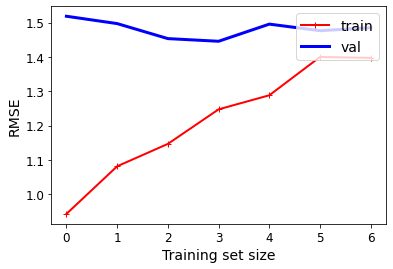

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_learning_curves(model, X_,X_valid,y_,y_valid):
    X_train, X_val, y_train, y_val = X_,X_valid,y_,y_valid
    train_errors, val_errors = [], []
    for m in range(6000, 42001,6000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
#knn_clf1 = KNeighborsClassifier(weights='distance', n_neighbors = 3, leaf_size = 10 )
plot_learning_curves(sgd_clf,X_train,X_valid,y_train,y_valid)
               # not shown in the book
plt.show()                                      # not shown